In [2]:
import matplotlib.pyplot as plt  
import numpy as np

## Pension months

The number of months people will receive a pension, is based on the number of months they paid into the system.
Asume, the goal is to pay 40 years (480 months) into the pension:


$$pensionMonths(paidMonths) = \frac{paidMonths^2}{480} $$

The idea of using a quadratic function is, to incentivize people to pay 40 years if possible.

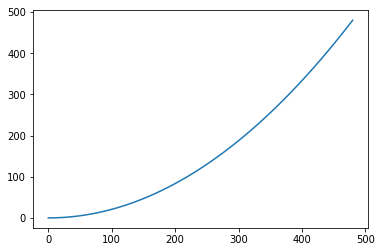

In [10]:
paidMonths = np.linspace(0, 480)
plt.plot(paidMonths, paidMonths**2/480, label='linear')

## Pension token bonus factor

Also, we want to reward people that start using the pension system earlier and grant a bonus with the first 40 years. The bonus decreases over time.

$$bonusFactor(year)=1.5-(0.135*\log{(year)})$$

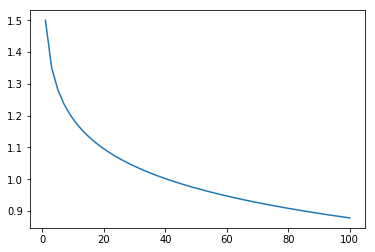

In [21]:
year = np.linspace(1, 100)
plt.plot(year, 1.5 - (0.135 * np.log(year)), label='bonus factor')

## Target price

$$targetPrice(month) = \tilde{payments[month]} $$

## Pension token

$$
\
    pensionTokens(amount)= 
\begin{cases}
    1 + \frac{ amount-targetPrice(month)}{\max{payments[month]} - targetPrice(month)} * bonusFactor(year),& \text{if } amount\geq targetPrice(month)\\
    \frac{ amount- \min{payments[month]}}{targetPrice(month) - \min{payments[month]}} * bonusFactor(year),              & \text{otherwise}
\end{cases}
\
$$

## Pension payout

$$ monthFactor = \frac{\sum_{k=1}^{paidMonths} pensionTokens(amount_{user})}{paidMonths} $$

$$ myActivatedPart = \frac{monthFactor}{\sum_{k=1}^{pensioners} monthFactor} $$

$$ distributionPercentage = \frac{\sum_{k=1}^{pensioners} monthFactor}{totalPensionTokenSupply} $$

$$ distributionAmount = (fond * distributionPercentage) + monthFund * (1 - distributionPercentage) $$

$$ pensionPayout = distributionAmount * myActivatedPart $$


$$ pensionPayout = ((fond * (\frac{\sum_{k=1}^{pensioners} monthFactor}{totalPensionTokenSupply})) + monthFund * (1 - (\frac{\sum_{k=1}^{pensioners} monthFactor}{totalPensionTokenSupply}))) * \frac{\frac{\sum_{k=1}^{paidMonths} pensionTokens(amount_{user})}{paidMonths}}{\sum_{k=1}^{pensioners} monthFactor} $$
